**WEB SCRAPING BERITA : LE SSERAFIM**

Tujuan : Mengambil berita dari X yang membahas tentang Le Sserafim, khususnya penampilan mereka di Coachella 2024.

Tools : Python, Requests, BeautifulSoup, Pandas

Output : Dataset yang berisi judul dan tautan berita terkait, disimpan dalam format CSV untuk analisis lebih lanjut.

In [30]:
#X authentication token
x_auth_token = 'a96cde389776711f95f861e9037d1fba8d840ea5'

In [31]:
#import required Python package
!pip install pandas

In [32]:
#install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,546 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,211 kB]
Fetched 5,013 kB in 3s (1,713 kB/s

In [7]:
#crawl data
filename = 'lesserafim.csv'
search_keyword = 'le sserafim since:2024-04-13 until:2024-04-20 lang:id'
limit = 100

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {x_auth_token}

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦npm warn deprecated rimraf@3.0.2: Rimraf versions prior to v4 are no longer supported
⠦npm warn deprecated inflight@1.0.6: This module is not supported, and leaks memory. Do not use it. Check out lru-cache if you want a good and tested way to coalesce async requests by a key value, which is much more comprehensive and powerful.
⠦npm warn deprecated glob@7.2.3: Glob versions prior to v9 are no longer supported
⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter 

In [8]:
import pandas as pd

In [12]:
#specify the path to the CSV file
file_path = f"tweets-data/{filename}"

In [13]:
#read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

In [14]:
#display the DataFrame
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1781471515592228895,Fri Apr 19 23:54:42 +0000 2024,0,Gak bawa le sserafim gak rame,1781471515592228895,NaN,NaN,in,NaN,0,0,0,https://x.com/reiissante/status/17814715155922...,1675155509878599680,reiissante
1,1781469981261320256,Fri Apr 19 23:48:36 +0000 2024,1,lol tetiba salahkan eunchae sebab sapa suruh d...,1781469981261320256,NaN,NaN,in,NaN,0,0,0,https://x.com/eunchaeeeeelove/status/178146998...,1758291613745659905,eunchaeeeeelove
2,1781468915656458355,Fri Apr 19 23:44:22 +0000 2024,0,Le sserafim punya Coachella performance mcm ny...,1781468915656458355,NaN,NaN,in,🇲🇾,0,0,0,https://x.com/anissnajwa_/status/1781468915656...,1372956506656706561,anissnajwa_
3,1781468487598444974,Fri Apr 19 23:42:40 +0000 2024,1,Hybe memang bongokss pilih member le sserafim ...,1781468487598444974,NaN,NaN,in,🇲🇾,0,1,0,https://x.com/anissnajwa_/status/1781468487598...,1372956506656706561,anissnajwa_
4,1781363922400051246,Fri Apr 19 23:37:34 +0000 2024,0,@viraltakes buat yg hate le sserafim nah sukur...,1781467203902283820,NaN,viraltakes,in,she/her,0,0,0,https://x.com/youurdeey/status/178146720390228...,1214056655475724291,youurdeey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1781221206961881573,Fri Apr 19 07:20:03 +0000 2024,0,Rahasia Cantik Bersama Sakura dari LE SSERAFIM...,1781221206961881573,NaN,NaN,in,Jakarta Capital Region,0,0,0,https://x.com/stevegerard22/status/17812212069...,120283718,stevegerard22
99,1781221086329508048,Fri Apr 19 07:19:35 +0000 2024,1,OP Ini Hadir Coachella Ngaku Kaget LE SSERAFIM...,1781221086329508048,NaN,NaN,in,Indonesia,0,0,1,https://x.com/KpopChartNet/status/178122108632...,972179486,KpopChartNet
100,1781220667083690466,Fri Apr 19 07:17:55 +0000 2024,0,semangat Le Sserafim week 2 nya HABISKAN!!!,1781220667083690466,NaN,NaN,in,soshirevelae2hearts,0,0,0,https://x.com/imjoraengi/status/17812206670836...,1533479517511032832,imjoraengi
101,1781219936922407114,Fri Apr 19 07:15:01 +0000 2024,27,*le sserafim lagi dihujat* ️ : lah idol gua ju...,1781219936922407114,NaN,NaN,in,hongppippi mom!,0,1,7,https://x.com/hongpippi/status/178121993692240...,1706766563372863488,hongpippi


In [18]:
#check the number of collected data entries
num_tweets = len(df)
print(f"JUMLAH TWEET DALAM DATAFRAME ADALAH {num_tweets}")

JUMLAH TWEET DALAM DATAFRAME ADALAH 103


In [20]:
#upload local CSV file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving lesserafim.csv to lesserafim.csv


In [21]:
import pandas as pd

In [23]:
#load the CSV file
df = pd.read_csv("lesserafim.csv")

In [24]:
#preview the first 5 rows
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1781471515592228895,Fri Apr 19 23:54:42 +0000 2024,0,Gak bawa le sserafim gak rame,1781471515592228895,NaN,NaN,in,NaN,0,0,0,https://x.com/reiissante/status/17814715155922...,1675155509878599680,reiissante
1,1781469981261320256,Fri Apr 19 23:48:36 +0000 2024,1,lol tetiba salahkan eunchae sebab sapa suruh d...,1781469981261320256,NaN,NaN,in,NaN,0,0,0,https://x.com/eunchaeeeeelove/status/178146998...,1758291613745659905,eunchaeeeeelove
2,1781468915656458355,Fri Apr 19 23:44:22 +0000 2024,0,Le sserafim punya Coachella performance mcm ny...,1781468915656458355,NaN,NaN,in,🇲🇾,0,0,0,https://x.com/anissnajwa_/status/1781468915656...,1372956506656706561,anissnajwa_
3,1781468487598444974,Fri Apr 19 23:42:40 +0000 2024,1,Hybe memang bongokss pilih member le sserafim ...,1781468487598444974,NaN,NaN,in,🇲🇾,0,1,0,https://x.com/anissnajwa_/status/1781468487598...,1372956506656706561,anissnajwa_
4,1781363922400051246,Fri Apr 19 23:37:34 +0000 2024,0,@viraltakes buat yg hate le sserafim nah sukur...,1781467203902283820,NaN,viraltakes,in,she/her,0,0,0,https://x.com/youurdeey/status/178146720390228...,1214056655475724291,youurdeey


In [25]:
#view the available columns
df.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [26]:
#filter only the required columns
filtered_df = df[["created_at", "favorite_count", "retweet_count"]]

In [27]:
#show the filtered data
filtered_df.head()

,created_at,favorite_count,retweet_count
0,Fri Apr 19 23:54:42 +0000 2024,0,0
1,Fri Apr 19 23:48:36 +0000 2024,1,0
2,Fri Apr 19 23:44:22 +0000 2024,0,0
3,Fri Apr 19 23:42:40 +0000 2024,1,0
4,Fri Apr 19 23:37:34 +0000 2024,0,0


In [34]:
#save and download the filtered results (optional)
filtered_df.to_csv("filtered_lesserafim.csv", index=False)
files.download("filtered_lesserafim.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
print(df.columns)

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')


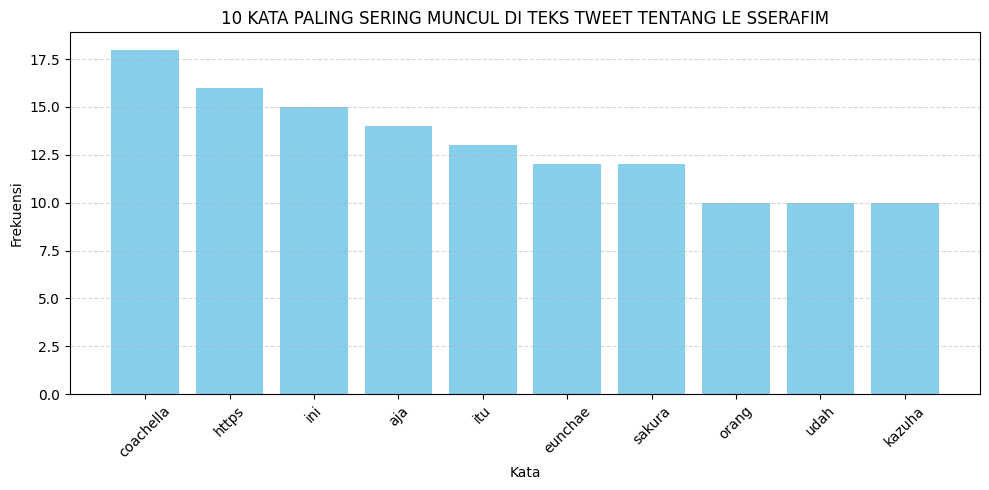

In [37]:
#analyze the most frequent words in the 'full_text' column
import re
from collections import Counter
import matplotlib.pyplot as plt

judul_all = ' '.join(df['full_text']).lower()
stopwords = ['le', 'sserafim', 'dan', 'yang', 'dengan', 'untuk', 'dari', 'di']

words = re.findall(r'\b\w+\b', judul_all)
filtered_words = [word for word in words if word not in stopwords and len(word) > 2]

word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)

plt.figure(figsize=(10,5))
plt.bar(*zip(*top_words), color='skyblue')
plt.title('10 KATA PALING SERING MUNCUL DI TEKS TWEET TENTANG LE SSERAFIM')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Proyek ini menunjukkan bagaimana data berita tentang Le Sserafim dapat diambil secara otomatis dari platform X menggunakan teknik web scraping. Hasil scraping menunjukkan bahwa topik-topik seputar konser dan kontroversi Le Sserafim cukup dominan dalam berita yang ditemukan. Melalui analisis kata, kita juga dapat mengidentifikasi kata-kata yang paling sering muncul di judul berita. Proyek ini dapat dikembangkan lebih lanjut dengan menambahkan sumber berita lain, analisis sentimen, atau klasifikasi topik berita.